In [ ]:
#1.1

import numpy as np

# Sampling rate
fs = 1600  # Hz
T = 1 / fs  # Sampling period in seconds
duration = 2  # seconds

# Generate the time array
t = np.arange(0, duration, T)

# Confirm the size
print(f"Number of samples: {len(t)}")


Number of samples: 3200


### Maximum Frequency

According to the Nyquist–Shannon Sampling Theorem:

$$
f_{\text{max}} = \frac{f_s}{2} = \frac{1600}{2} = 800 \, \text{Hz}
$$

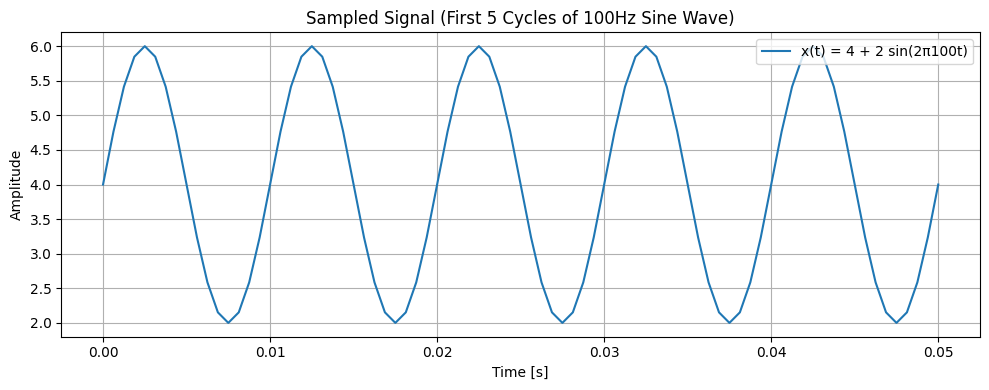

In [ ]:
#1.2

import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1600  # Hz
T = 1 / fs
duration = 2
t = np.arange(0, duration, T)

# Sampled signal
x = 4 + 2 * np.sin(2 * np.pi * 100 * t)

# Limit to 0.05 seconds (5 sine wave cycles)
max_time = 0.05
t_limited = t[t <= max_time]
x_limited = x[:len(t_limited)]

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t_limited, x_limited, label='x(t) = 4 + 2 sin(2π100t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sampled Signal (First 5 Cycles of 100Hz Sine Wave)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



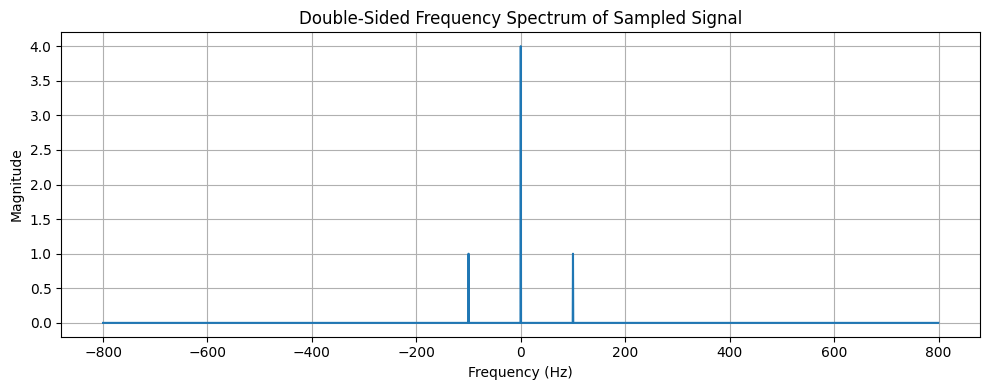

In [ ]:
#2.0

import numpy as np
import matplotlib.pyplot as plt

# Sampling setup (same as before)
fs = 1600  # Hz
T = 1 / fs
duration = 2
t = np.arange(0, duration, T)

# Sampled signal
x = 4 + 2 * np.sin(2 * np.pi * 100 * t)

# Compute FFT
X = np.fft.fft(x)
N = len(X)
freqs = np.fft.fftfreq(N, T)

# Shift for double-sided spectrum
X_shifted = np.fft.fftshift(X)
freqs_shifted = np.fft.fftshift(freqs)

# Plot magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs_shifted, np.abs(X_shifted) / N)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Double-Sided Frequency Spectrum of Sampled Signal')
plt.grid(True)
plt.tight_layout()
plt.show()
